# Exploring the Math Behind Crash | Roobet Cryptocurrency Casino Game

Exploring the math, statistics, and code of the Roobet Crash cryptocurrency casino game in order to calculate the expected value and average loss per game. Using Python, we are able to simulate different betting strategies and determine the effectiveness of these approaches.

https://www.youtube.com/watch?v=F1HA7e3acSI
https://github.com/drewnicolette/roobet

## Necessary Libraries and Constants

In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm
import hmac
import hashlib

## Get Result and Get Previous Game Function

$$int \left( \dfrac{100\cdot e - h}{e-h} \right) \cdot \dfrac{1}{100}$$

In [2]:
e = 2 ** 52
salt = "0000000000000000000fa3b65e43e4240d71762a5bf397d5304b2596d116859c"


def get_result(game_hash):
    hm = hmac.new(str.encode(game_hash), b'', hashlib.sha256)
    hm.update(salt.encode("utf-8"))
    h = hm.hexdigest()
    if int(h, 16) % 33 == 0:
        return 1
    h = int(h[:13], 16)
    return (((100 * e - h) / (e - h)) // 1) / 100.0


def get_prev_game(hash_code):
    m = hashlib.sha256()
    m.update(hash_code.encode("utf-8"))
    return m.hexdigest()

## Collecting All Game Results

In [3]:
game_hash = 'bc5dd9bdf7a51117a0477056c6c5e37887525f149dc18f100aa49403eff6641c'  # Update to latest game's hash for more results
first_game = "77b271fe12fca03c618f63dfb79d4105726ba9d4a25bb3f1964e435ccf9cb209"

In [4]:
# results = []
# while game_hash != first_game:
#     results.append(get_result(game_hash))
#     game_hash = get_prev_game(game_hash)

Total Amount of since 2023 is much higher. can't calculate in seconds. So we use only one million games.

In [5]:
# results = np.array(results)

In [6]:
# len(results)

In [7]:
# with tqdm(total=100) as pbar:
#     for i in range(10):
#         time.sleep(0.1)
#         pbar.update(10)

# score = [1, 2, 3, 4, 5]
# with open("file.txt", "w") as f:
#     for s in score:
#         f.write(str(s) + "\n")

In [8]:
# results = []
# with open("file.txt", "w") as f:
#     with tqdm(total=100) as pbar:
#         while game_hash != first_game:
#             # results.append(get_result(game_hash))
#             f.write(str(get_result(game_hash)) + "\n")
#             game_hash = get_prev_game(game_hash)
#             pbar.update()

In [9]:
game_hash = 'hash of the last game'

results = []
count = 0
total = 10 ** 6
with tqdm(total=total) as pbar:
    for x in range(total):
        results.append(get_result(game_hash))
        game_hash = get_prev_game(game_hash)
        pbar.update(1)

results = np.array(results)

100%|████████████████████████████████████████████████████████████████████| 1000000/1000000 [00:06<00:00, 148956.05it/s]


We could use more result. but i don't think that necessory

## Testing Probability Formula

Probability of lossing of using the data and using the formula

Let $U$ ~ $Uniform(0,e)$ Where $e = 2^{52}$

$Multiplier = \dfrac{100e-U}{e-U} \cdot \dfrac{1}{100}$

$Multiplier = \dfrac{99e +  (e-U)}{e-U} \cdot \dfrac{1}{100}$

$\approx \dfrac{99e}{100U} + 0.01$

$\approx 0.01 + \dfrac{0.99}{Uniform(0,1)}$

$\dfrac{0.99}{Uniform(0,1)}$

So, $P(X\leq x) \approx 1 - \dfrac{1}{x}$

According to the code:

$$P(X\leq x) = \dfrac{1}{33} + \dfrac{32}{33}(0.01+0.99(1-\dfrac{1}{x}))$$

## Probability of lossing 

In [10]:
multiplier = 2
1 / 33 + (32 / 33) * (.01 + .99 * (1 - 1 / multiplier))

0.52

In [11]:
(results <= multiplier).mean()

0.519544

## Testing Expected Value Formula

In [12]:
multiplier = 2
((1 / 33) + (32 / 33) * (.01 + .99 * (1 - 1 / (multiplier - .01)))) * -1 + (multiplier - 1) * (
            1 - ((1 / 33) + (32 / 33) * (.01 + .99 * (1 - 1 / (multiplier - .01)))))

-0.03517587939698519

In [13]:
(results < multiplier).mean() * -1 + (multiplier - 1) * (results >= multiplier).mean()

-0.03421000000000002

## Visualizations

Text(0.5, 0, 'Multiplier')

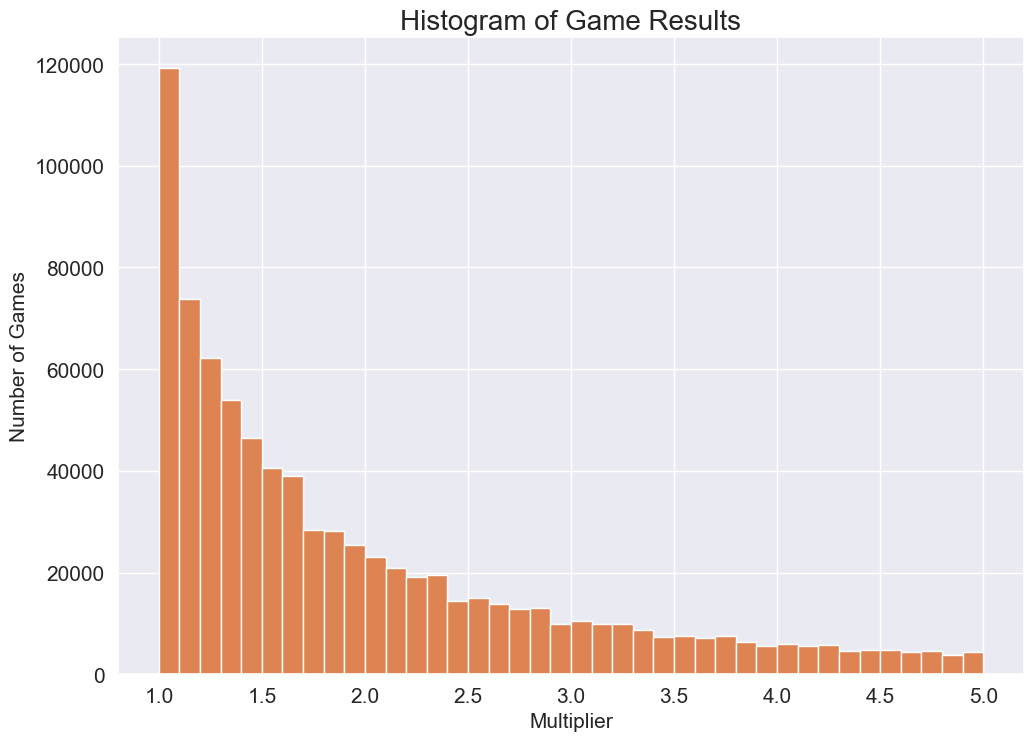

In [14]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
plt.hist(results, bins=40, range=(1, 5))
plt.hist(results, bins=40, range=(1, 5))
plt.title("Histogram of Game Results", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Number of Games", fontsize=15)
plt.xlabel("Multiplier", fontsize=15)

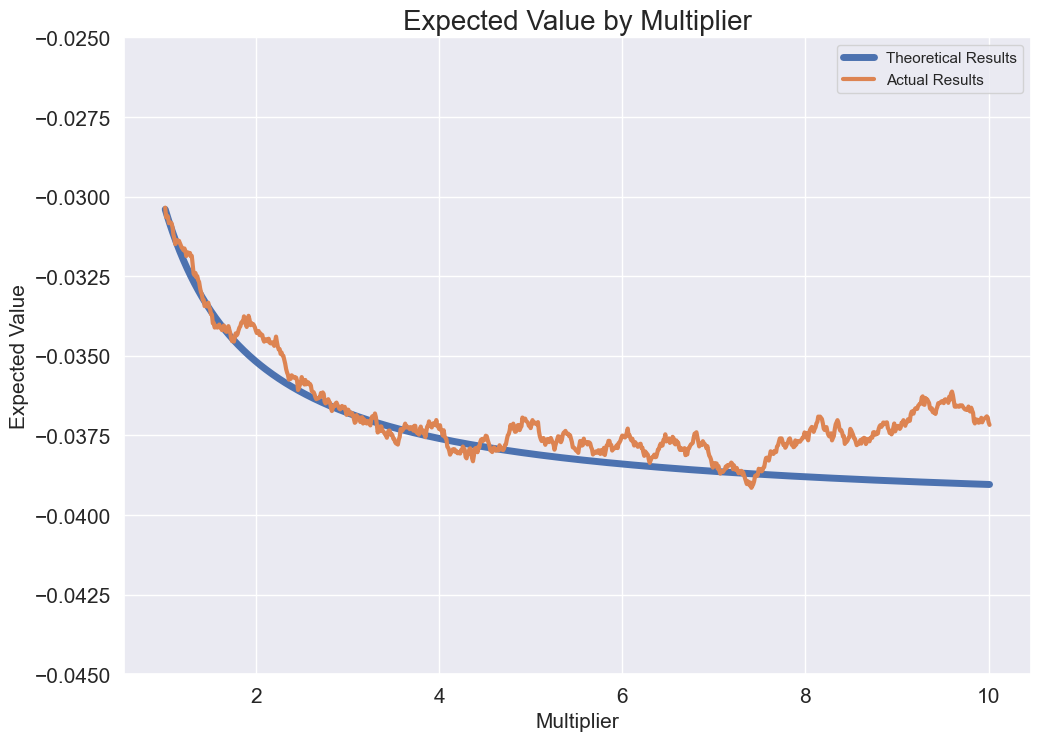

In [15]:
def calculate_ev(multiplier):
    return ((1 / 33) + (32 / 33) * (.01 + .99 * (1 - 1 / (multiplier - .01)))) * -1 + (multiplier - 1) * (
                1 - ((1 / 33) + (32 / 33) * (.01 + .99 * (1 - 1 / (multiplier - .01)))))


xs = np.linspace(101, 1001, 901) / 100
ys = [calculate_ev(x) for x in xs]
y2s = [(results < x).mean() * -1 + (x - 1) * (results >= x).mean() for x in xs]

plt.plot(xs, ys, linewidth=5)

plt.xlabel("Multiplier", fontsize=15)
plt.ylabel("Expected Value", fontsize=15)
plt.ylabel("Expected Value", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-.045, -.025)

plt.plot(xs, y2s, linewidth=3)

plt.title("Expected Value by Multiplier", fontsize=20)
plt.legend(["Theoretical Results", "Actual Results"])
plt.show()

# Martingale Strategy

In [16]:
negatives = []
in_a_row = 0
for multiplier in results:
    if multiplier < 1.4:
        in_a_row += 1
    else:
        in_a_row = 0
    negatives.append(in_a_row)
negatives = np.array(negatives)

In [17]:
for i in range(1, 14):
    print("Probability of Losing %d Game(s) in a Row:" % i, (negatives >= i).mean())

Probability of Losing 1 Game(s) in a Row: 0.309285
Probability of Losing 2 Game(s) in a Row: 0.095721
Probability of Losing 3 Game(s) in a Row: 0.029599
Probability of Losing 4 Game(s) in a Row: 0.00921
Probability of Losing 5 Game(s) in a Row: 0.002879
Probability of Losing 6 Game(s) in a Row: 0.000919
Probability of Losing 7 Game(s) in a Row: 0.000299
Probability of Losing 8 Game(s) in a Row: 0.000104
Probability of Losing 9 Game(s) in a Row: 3.1e-05
Probability of Losing 10 Game(s) in a Row: 1e-05
Probability of Losing 11 Game(s) in a Row: 1e-06
Probability of Losing 12 Game(s) in a Row: 0.0
Probability of Losing 13 Game(s) in a Row: 0.0


In [18]:
for i in range(1, 15):
    print("Probability of Losing %d Game(s) in a Row:" % i, sum(negatives >= i))

Probability of Losing 1 Game(s) in a Row: 309285
Probability of Losing 2 Game(s) in a Row: 95721
Probability of Losing 3 Game(s) in a Row: 29599
Probability of Losing 4 Game(s) in a Row: 9210
Probability of Losing 5 Game(s) in a Row: 2879
Probability of Losing 6 Game(s) in a Row: 919
Probability of Losing 7 Game(s) in a Row: 299
Probability of Losing 8 Game(s) in a Row: 104
Probability of Losing 9 Game(s) in a Row: 31
Probability of Losing 10 Game(s) in a Row: 10
Probability of Losing 11 Game(s) in a Row: 1
Probability of Losing 12 Game(s) in a Row: 0
Probability of Losing 13 Game(s) in a Row: 0
Probability of Losing 14 Game(s) in a Row: 0


In [19]:
print("Probability of Losing %d Game(s) in a Row:" % 15, sum(negatives >= 15))

Probability of Losing 15 Game(s) in a Row: 0


# Martingale Strategy -  Our Version
final profit = last spend * 2

In [20]:
def bid(begin_value=100, multiplier=1.2, end_value=100000):
    spend_list = [begin_value]
    bid_list = [begin_value]

    while spend_list[-1] <= end_value:
        bid_list.append(round((spend_list[-1] + begin_value) * (1 / (multiplier - 1))))
        spend_list.append(sum(bid_list))

    if spend_list[-1] >= end_value:
        spend_list.pop()
        bid_list.pop()

    print("Total Spend : \t\t\t\t\t", spend_list)
    print("Bid of Each Turn : \t\t\t\t", bid_list)
    print()
    print("No of turns you can play before runout of money: ", len(bid_list))

    negatives = []
    in_a_row = 0
    for result in results:
        if result < multiplier:
            in_a_row += 1
        else:
            in_a_row = 0
        negatives.append(in_a_row)
    negatives = np.array(negatives)
    print("\t\t\t\t\t\t From Data \t From Formula")
    print("\t\t\t\t\t\t-------------------------")
    for i in range(1, len(bid_list) + 1):
        print("Probability of Losing %d Game(s) in a Row:\t" % i, round((negatives >= i).mean(), 6), "\t",
              round((1 / 33 + (32 / 33) * (.01 + .99 * (1 - 1 / multiplier))) ** i, 6))

In [21]:
x = 1.4
print("Our Guess :\t\t\t\t\t ", x)
bid(begin_value=100, multiplier=x, end_value=50000)
print("\n", "-" * 100, "\n")

Our Guess :					  1.4
Total Spend : 					 [100, 600, 2350, 8475, 29913]
Bid of Each Turn : 				 [100, 500, 1750, 6125, 21438]

No of turns you can play before runout of money:  5
						 From Data 	 From Formula
						-------------------------
Probability of Losing 1 Game(s) in a Row:	 0.309285 	 0.314286
Probability of Losing 2 Game(s) in a Row:	 0.095721 	 0.098776
Probability of Losing 3 Game(s) in a Row:	 0.029599 	 0.031044
Probability of Losing 4 Game(s) in a Row:	 0.00921 	 0.009757
Probability of Losing 5 Game(s) in a Row:	 0.002879 	 0.003066

 ---------------------------------------------------------------------------------------------------- 



In [22]:
for x in np.arange(1.1, 2.1, 0.1):
    print("Our Guess :\t\t\t\t\t ", round(x, 5))
    bid(begin_value=100, multiplier=x, end_value=100000)
    print("\n", "-" * 100, "\n")

Our Guess :					  1.1
Total Spend : 					 [100, 2100, 24100]
Bid of Each Turn : 				 [100, 2000, 22000]

No of turns you can play before runout of money:  3
						 From Data 	 From Formula
						-------------------------
Probability of Losing 1 Game(s) in a Row:	 0.11927 	 0.127273
Probability of Losing 2 Game(s) in a Row:	 0.014281 	 0.016198
Probability of Losing 3 Game(s) in a Row:	 0.001724 	 0.002062

 ---------------------------------------------------------------------------------------------------- 

Our Guess :					  1.2
Total Spend : 					 [100, 1100, 7100, 43100]
Bid of Each Turn : 				 [100, 1000, 6000, 36000]

No of turns you can play before runout of money:  4
						 From Data 	 From Formula
						-------------------------
Probability of Losing 1 Game(s) in a Row:	 0.199739 	 0.2
Probability of Losing 2 Game(s) in a Row:	 0.039925 	 0.04
Probability of Losing 3 Game(s) in a Row:	 0.007952 	 0.008
Probability of Losing 4 Game(s) in a Row:	 0.00157 	 0.0016

 --------------

---

In [23]:
# Probability of Losing All the money
p_theorical = []
p_practical = []


def bid(begin_value=100, multiplier=1.2, end_value=100000):
    # At Begining
    spend_list = [begin_value]
    bid_list = [begin_value]

    # While Playing
    while spend_list[-1] <= end_value:
        bid_list.append(round((spend_list[-1] + begin_value) * (1 / (multiplier - 1))))
        spend_list.append(sum(bid_list))

    # We can't exeed the end value
    if spend_list[-1] >= end_value:
        spend_list.pop()
        bid_list.pop()

    #     Calculate the Practical value
    negatives = []
    in_a_row = 0
    for result in results:
        if result < multiplier:
            in_a_row += 1
        else:
            in_a_row = 0
        negatives.append(in_a_row)
    negatives = np.array(negatives)

    p_practical.append((negatives >= len(bid_list)).mean())

    p_theorical.append((1 / 33 + (32 / 33) * (.01 + .99 * (1 - 1 / multiplier))) ** len(bid_list))

In [24]:
len(np.linspace(1.1, 2.0, 100))

100

In [25]:
from tqdm import tqdm

xs = np.linspace(1.1, 2.0, 100)
for x in tqdm(xs):
    bid(begin_value=100, multiplier=x, end_value=100000)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.96it/s]


In [26]:
len(p_practical), len(p_theorical)

(100, 100)

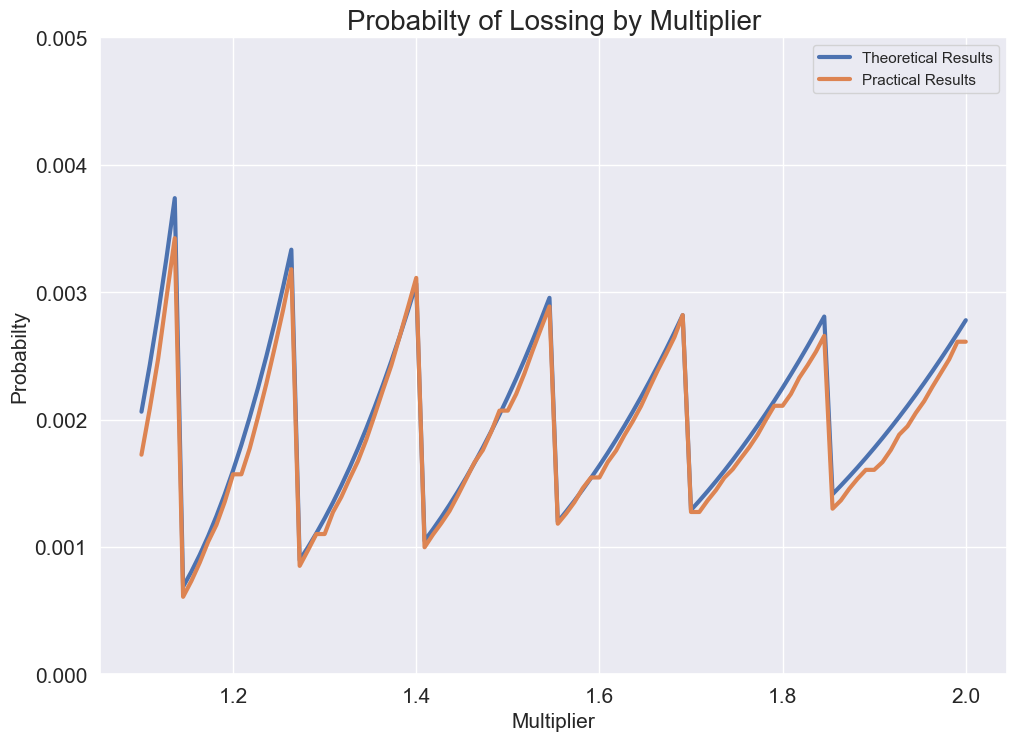

In [27]:
plt.plot(xs, p_theorical, linewidth=3)
plt.plot(xs, p_practical, linewidth=3)

plt.xlabel("Multiplier", fontsize=15)
plt.ylabel("Probabilty", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 0.005)

plt.title("Probabilty of Lossing by Multiplier", fontsize=20)
plt.legend(["Theoretical Results", "Practical Results"])
plt.show()

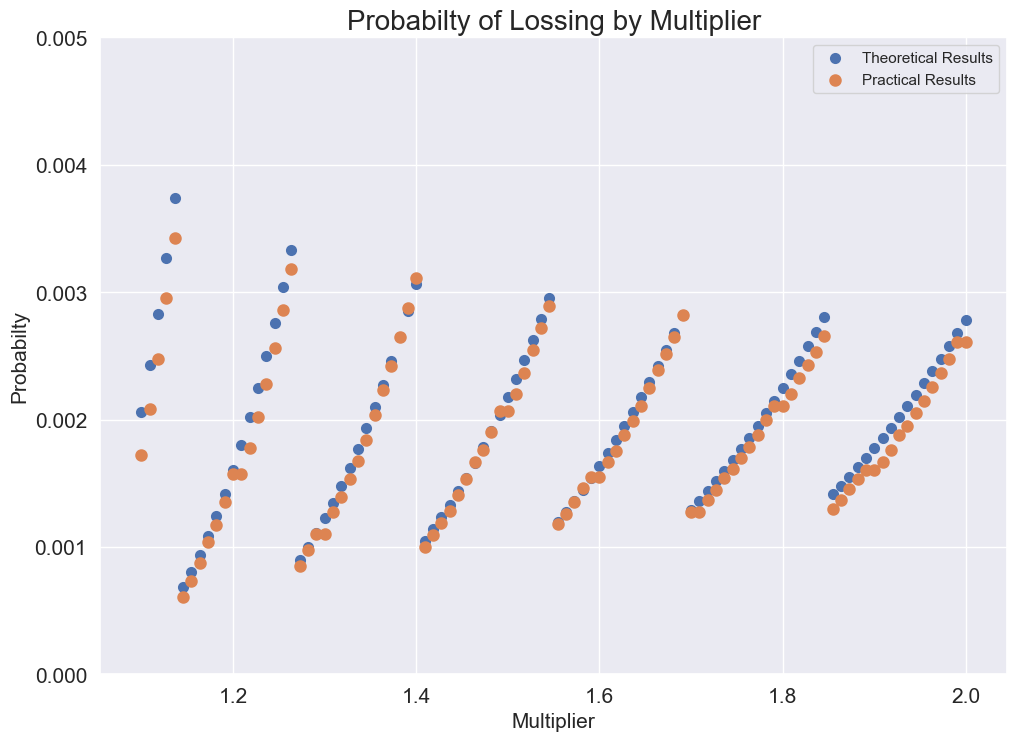

In [28]:
plt.scatter(xs, p_theorical, linewidth=2)
plt.scatter(xs, p_practical, linewidth=3)

plt.xlabel("Multiplier", fontsize=15)
plt.ylabel("Probabilty", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 0.005)

plt.title("Probabilty of Lossing by Multiplier", fontsize=20)
plt.legend(["Theoretical Results", "Practical Results"])
plt.show()

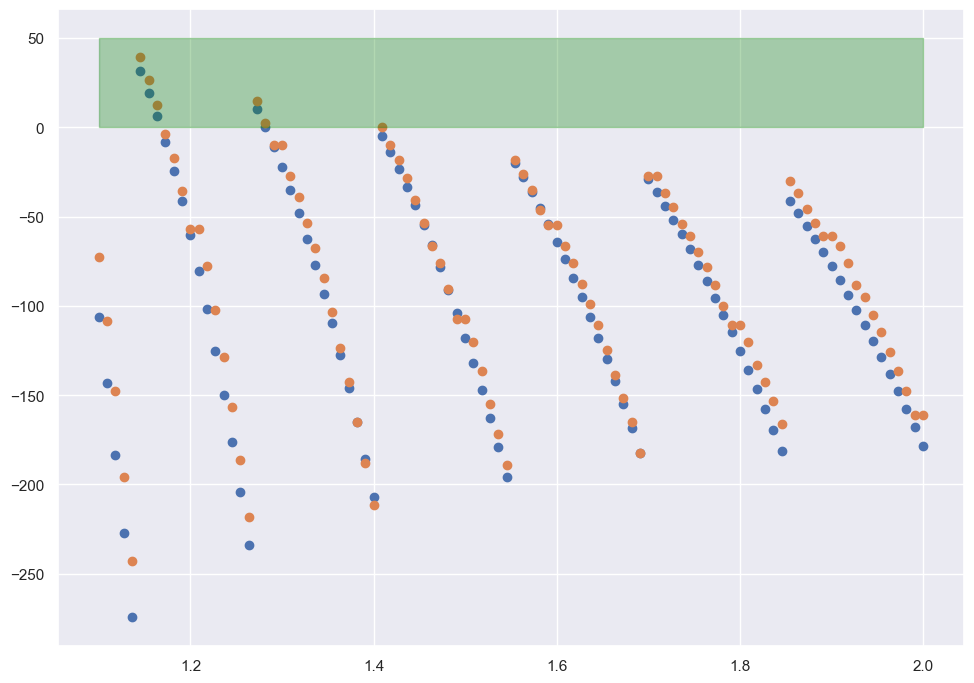

In [29]:
new1 = []
for i in range(len(p_theorical)):
    new1.append((1 - p_theorical[i]) * 100 - 100000 * p_theorical[i])
plt.scatter(xs, new1)

new2 = []
for i in range(len(p_practical)):
    new2.append((1 - p_practical[i]) * 100 - 100000 * p_practical[i])
plt.scatter(xs, new2)

plt.fill_between(xs, np.ones(len(new1)) * 50, alpha=0.3, color='green')
plt.show()

In [30]:
p_theorical[new2.index(max(new2))], min(p_practical)

(0.0006871293339709279, 0.000608)

In [31]:
best = min(p_practical)
best

0.000608

In [32]:
xs[p_practical.index(min(p_practical))]

1.1454545454545455

In [33]:
(1 - best) / best

1643.736842105263

In [34]:
(1 - 0.00278) * 100 - 100000 * 0.00278

-178.27800000000002

In [35]:
(1 - best) * 100 - 100000 * best

39.139199999999995

If you Play until end of the World You will have profit of Rs.31

In [36]:
# Probability of Losing All the money
p_theorical2 = []
p_practical2 = []


def bid(begin_value=100, multiplier=1.2, end_value=100000):
    # At Begining
    spend_list = [begin_value]
    bid_list = [begin_value]

    # While Playing
    while spend_list[-1] <= end_value:
        bid_list.append(round((spend_list[-1] + begin_value) * (1 / (multiplier - 1))))
        spend_list.append(sum(bid_list))

    # We can't exeed the end value
    if spend_list[-1] >= end_value:
        spend_list.pop()
        bid_list.pop()

    #     Calculate the Practical value
    #     negatives = []
    #     in_a_row = 0
    #     for result in results:
    #         if result < multiplier:
    #             in_a_row += 1
    #         else:
    #             in_a_row = 0
    #         negatives.append(in_a_row)
    #     negatives = np.array(negatives)

    #     p_practical2.append((negatives >= len(bid_list)).mean())

    p_theorical2.append((1 / 33 + (32 / 33) * (.01 + .99 * (1 - 1 / multiplier))) ** len(bid_list))


from tqdm import tqdm

xs = np.linspace(1.1, 10.0, 10000)
for x in tqdm(xs):
    bid(begin_value=100, multiplier=x, end_value=100000)

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 12374.79it/s]


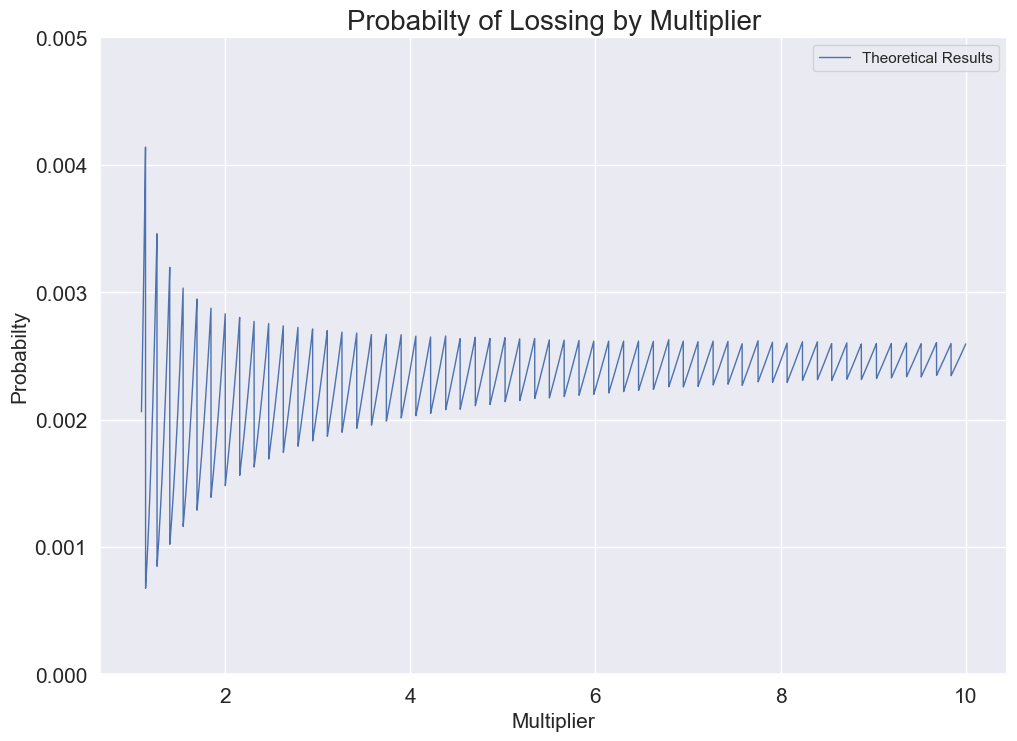

In [37]:
plt.plot(xs, p_theorical2, linewidth=1)
# plt.scatter(xs, p_theorical2)
# plt.plot(xs, p_practical2, linewidth=3)

plt.xlabel("Multiplier", fontsize=15)
plt.ylabel("Probabilty", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 0.005)

plt.title("Probabilty of Lossing by Multiplier", fontsize=20)
plt.legend(["Theoretical Results", "Practical Results"])
plt.show()

In [38]:
len(p_theorical2)

10000

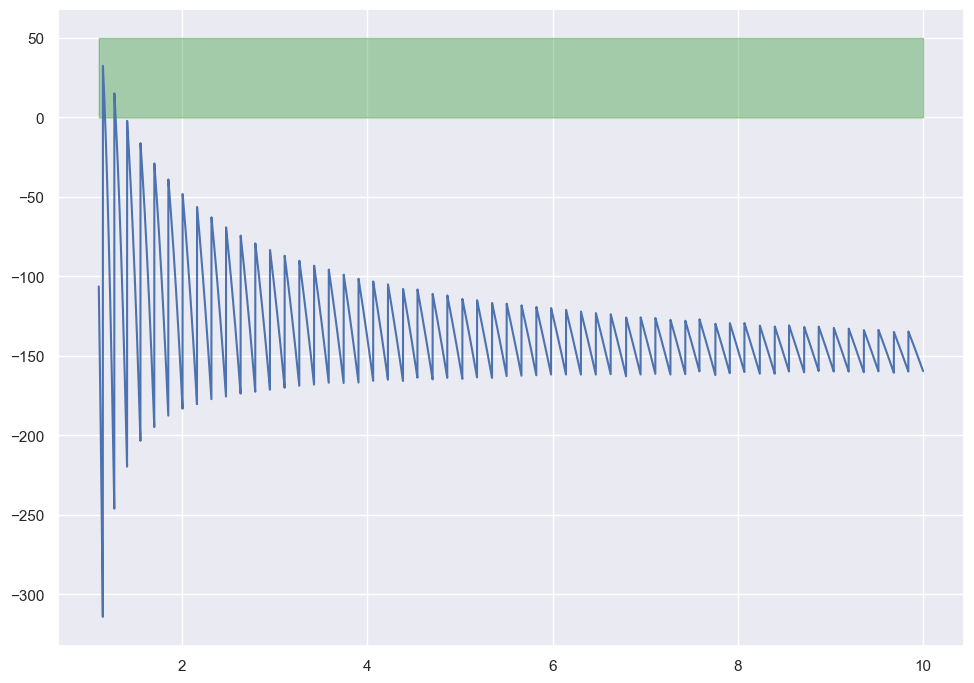

In [39]:
new = []
for i in range(len(p_theorical2)):
    new.append((1-p_theorical2[i])*100-100000*p_theorical2[i])

plt.plot(xs, new)
plt.fill_between(xs, np.ones(len(new))*50, alpha=0.3, color='green')
plt.show()

# Martingale Strategy - Our Version v2

Rs.20 Profit

In [40]:
def bid(begin_value=100, multiplier=1.2, end_value=100000):
    spend_list = [begin_value]
    bid_list = [begin_value]

    while spend_list[-1]<=end_value:
        if spend_list[-1] == begin_value:
            bid_list.append(round((spend_list[-1]*multiplier)*(1/(multiplier-1))))
            spend_list.append(sum(bid_list))
        else:
            bid_list.append(round((spend_list[-1] + begin_value*(multiplier-1))*(1/(multiplier-1))))
            spend_list.append(sum(bid_list))

    if spend_list[-1]>=end_value:
        spend_list.pop()
        bid_list.pop()


    print("Total Spend : \t\t\t\t\t", spend_list)
    print("Bid of Each Turn : \t\t\t\t", bid_list)
    print()
    print("No of turns you can play before runout of money: ", len(bid_list))

    negatives = []
    in_a_row = 0
    for result in results:
        if result < multiplier:
            in_a_row += 1
        else:
            in_a_row = 0
        negatives.append(in_a_row)
    negatives = np.array(negatives)
    print("\t\t\t\t\t\t From Data \t From Formula")
    print("\t\t\t\t\t\t-------------------------")
    for i in range(1, len(bid_list)+1):
        print("Probability of Losing %d Game(s) in a Row:\t"%i, round((negatives >= i).mean(),6),"\t",  round((1/33 + (32/33)*(.01 + .99*(1 - 1/multiplier)))**i, 6) )

In [41]:
x = 1.2
print("Our Guess :\t\t\t\t\t ", x)
bid(begin_value=100, multiplier=x, end_value=100000)
print("\n" ,"-"*100,"\n")

Our Guess :					  1.2
Total Spend : 					 [100, 700, 4300, 25900]
Bid of Each Turn : 				 [100, 600, 3600, 21600]

No of turns you can play before runout of money:  4
						 From Data 	 From Formula
						-------------------------
Probability of Losing 1 Game(s) in a Row:	 0.19303 	 0.2
Probability of Losing 2 Game(s) in a Row:	 0.037246 	 0.04
Probability of Losing 3 Game(s) in a Row:	 0.007135 	 0.008
Probability of Losing 4 Game(s) in a Row:	 0.001354 	 0.0016

 ---------------------------------------------------------------------------------------------------- 



In [42]:
for x in np.arange(1.1,2.1,0.1):
    print("Our Guess :\t\t\t\t\t ", round(x,5))
    bid(begin_value=100, multiplier=x, end_value=100000)
    print("\n" ,"-"*100,"\n")

Our Guess :					  1.1
Total Spend : 					 [100, 1200, 13300]
Bid of Each Turn : 				 [100, 1100, 12100]

No of turns you can play before runout of money:  3
						 From Data 	 From Formula
						-------------------------
Probability of Losing 1 Game(s) in a Row:	 0.11927 	 0.127273
Probability of Losing 2 Game(s) in a Row:	 0.014281 	 0.016198
Probability of Losing 3 Game(s) in a Row:	 0.001724 	 0.002062

 ---------------------------------------------------------------------------------------------------- 

Our Guess :					  1.2
Total Spend : 					 [100, 700, 4300, 25900]
Bid of Each Turn : 				 [100, 600, 3600, 21600]

No of turns you can play before runout of money:  4
						 From Data 	 From Formula
						-------------------------
Probability of Losing 1 Game(s) in a Row:	 0.199739 	 0.2
Probability of Losing 2 Game(s) in a Row:	 0.039925 	 0.04
Probability of Losing 3 Game(s) in a Row:	 0.007952 	 0.008
Probability of Losing 4 Game(s) in a Row:	 0.00157 	 0.0016

 ----------------

In [43]:
# Probability of Losing All the money
p_theorical = []
p_practical = []


def bid(begin_value=100, multiplier=1.2, end_value=100000):
    # At Begining
    spend_list = [begin_value]
    bid_list = [begin_value]

    # While Playing
    while spend_list[-1]<=end_value:
        if spend_list[-1] == begin_value:
            bid_list.append(round((spend_list[-1]*multiplier)*(1/(multiplier-1))))
            spend_list.append(sum(bid_list))
        else:
            bid_list.append(round((spend_list[-1] + begin_value*(multiplier-1))*(1/(multiplier-1))))
            spend_list.append(sum(bid_list))

    # We can't exeed the end value
    if spend_list[-1]>=end_value:
        spend_list.pop()
        bid_list.pop()

#     Calculate the Practical value
    negatives = []
    in_a_row = 0
    for result in results:
        if result < multiplier:
            in_a_row += 1
        else:
            in_a_row = 0
        negatives.append(in_a_row)
    negatives = np.array(negatives)

    p_practical.append((negatives >= len(bid_list)).mean())

    p_theorical.append((1/33 + (32/33)*(.01 + .99*(1 - 1/multiplier)))**len(bid_list))

In [44]:
from tqdm import tqdm

xs = np.linspace(1.1,2.0,100)
for x in tqdm(xs):
    bid(begin_value=100, multiplier=x, end_value=100000)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.12it/s]


In [45]:
len(p_practical) , len(p_theorical)

(100, 100)

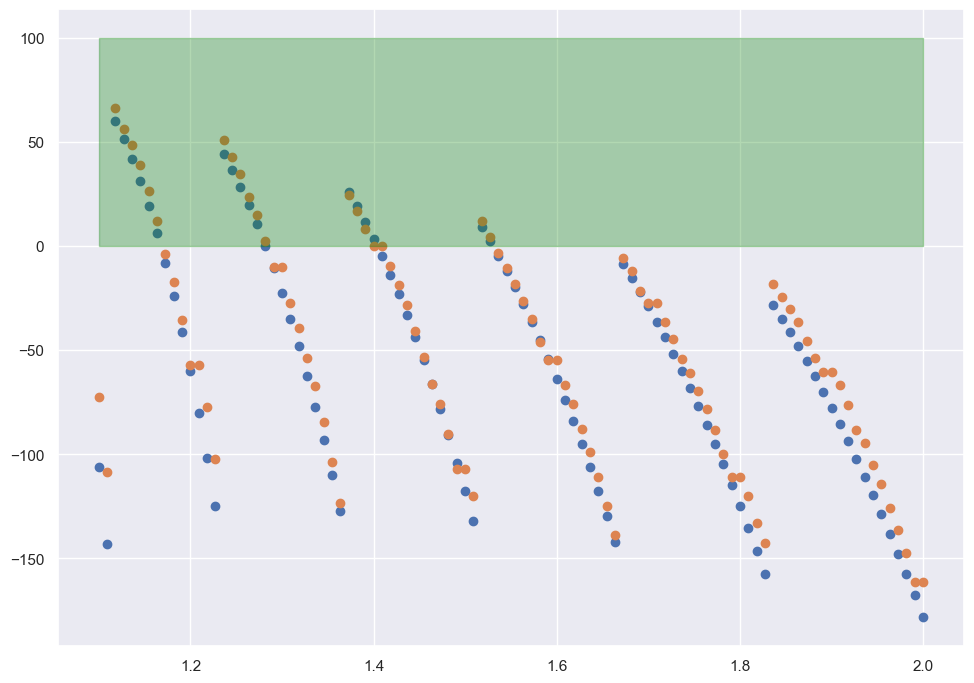

In [46]:
new1 = []
for i in range(len(p_theorical)):
    new1.append((1-p_theorical[i])*100-100000*p_theorical[i])
plt.scatter(xs, new1)

new2 = []
for i in range(len(p_practical)):
    new2.append((1-p_practical[i])*100-100000*p_practical[i])
plt.scatter(xs, new2)

plt.fill_between(xs, np.ones(len(new1))*100, alpha=0.3, color='green')
plt.show()

In [47]:
p_theorical[new2.index(max(new2))] , min(p_practical)

(0.0004004760487528848, 0.000335)

In [48]:
best = min(p_practical)
best

0.000335

In [49]:
xs[p_practical.index(min(p_practical))]

1.1181818181818182

In [50]:
(1-0.0004004760487528848)*100-100000*0.0004004760487528848

59.912347519836224

# Martingale Strategy - Our Version v3

Zero Profit

In [51]:
def bid(begin_value=100, multiplier=1.2, end_value=100000):
    spend_list = [begin_value]
    bid_list = [begin_value]

    while spend_list[-1]<=end_value:
        bid_list.append(round((spend_list[-1])*(1/(multiplier-1))))
        spend_list.append(sum(bid_list))

    if spend_list[-1]>=end_value:
        spend_list.pop()
        bid_list.pop()



    print("Total Spend : \t\t\t\t\t", spend_list)
    print("Bid of Each Turn : \t\t\t\t", bid_list)
    print()
    print("No of turns you can play before runout of money: ", len(bid_list))

    negatives = []
    in_a_row = 0
    for result in results:
        if result < multiplier:
            in_a_row += 1
        else:
            in_a_row = 0
        negatives.append(in_a_row)
    negatives = np.array(negatives)
    print("\t\t\t\t\t\t From Data \t From Formula")
    print("\t\t\t\t\t\t-------------------------")

    profit = 0
    wins = 0

    for i in range(1, len(bid_list)+1):
        wins += sum((negatives >= i))
        print("Probability of Losing %d Game(s) in a Row:\t"%i, round((negatives >= i).mean(),6),"\t",  round((1/33 + (32/33)*(.01 + .99*(1 - 1/multiplier)))**i, 6) )

    profit += (1000-wins)*100*(multiplier-1)

In [52]:
x = 1.2
print("Our Guess :\t\t\t\t\t ", x)
bid(begin_value=100, multiplier=x, end_value=100000)
print("\n" ,"-"*100,"\n")

Our Guess :					  1.2
Total Spend : 					 [100, 600, 3600, 21600]
Bid of Each Turn : 				 [100, 500, 3000, 18000]

No of turns you can play before runout of money:  4
						 From Data 	 From Formula
						-------------------------
Probability of Losing 1 Game(s) in a Row:	 0.19303 	 0.2
Probability of Losing 2 Game(s) in a Row:	 0.037246 	 0.04
Probability of Losing 3 Game(s) in a Row:	 0.007135 	 0.008
Probability of Losing 4 Game(s) in a Row:	 0.001354 	 0.0016

 ---------------------------------------------------------------------------------------------------- 



In [53]:
for x in np.arange(1.1,2.1,0.1):
    print("Our Guess :\t\t\t\t\t ", round(x,5))
    bid(begin_value=100, multiplier=x, end_value=100000)
    print("\n" ,"-"*100,"\n")

Our Guess :					  1.1
Total Spend : 					 [100, 1100, 12100]
Bid of Each Turn : 				 [100, 1000, 11000]

No of turns you can play before runout of money:  3
						 From Data 	 From Formula
						-------------------------
Probability of Losing 1 Game(s) in a Row:	 0.11927 	 0.127273
Probability of Losing 2 Game(s) in a Row:	 0.014281 	 0.016198
Probability of Losing 3 Game(s) in a Row:	 0.001724 	 0.002062

 ---------------------------------------------------------------------------------------------------- 

Our Guess :					  1.2
Total Spend : 					 [100, 600, 3600, 21600]
Bid of Each Turn : 				 [100, 500, 3000, 18000]

No of turns you can play before runout of money:  4
						 From Data 	 From Formula
						-------------------------
Probability of Losing 1 Game(s) in a Row:	 0.199739 	 0.2
Probability of Losing 2 Game(s) in a Row:	 0.039925 	 0.04
Probability of Losing 3 Game(s) in a Row:	 0.007952 	 0.008
Probability of Losing 4 Game(s) in a Row:	 0.00157 	 0.0016

 ----------------

In [54]:
# Probability of Losing All the money
p_theorical = []
p_practical = []


def bid(begin_value=100, multiplier=1.2, end_value=100000):
    # At Begining
    spend_list = [begin_value]
    bid_list = [begin_value]

    # While Playing
    while spend_list[-1]<=end_value:
        bid_list.append(round((spend_list[-1])*(1/(multiplier-1))))
        spend_list.append(sum(bid_list))

    # We can't exeed the end value
    if spend_list[-1]>=end_value:
        spend_list.pop()
        bid_list.pop()

#     Calculate the Practical value
    negatives = []
    in_a_row = 0
    for result in results:
        if result < multiplier:
            in_a_row += 1
        else:
            in_a_row = 0
        negatives.append(in_a_row)
    negatives = np.array(negatives)

    p_practical.append((negatives >= len(bid_list)).mean())

    p_theorical.append((1/33 + (32/33)*(.01 + .99*(1 - 1/multiplier)))**len(bid_list))

In [55]:
from tqdm import tqdm

xs = np.linspace(1.1,2.0,100)
for x in tqdm(xs):
    bid(begin_value=100, multiplier=x, end_value=100000)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.07it/s]


In [56]:
len(p_practical) , len(p_theorical)

(100, 100)

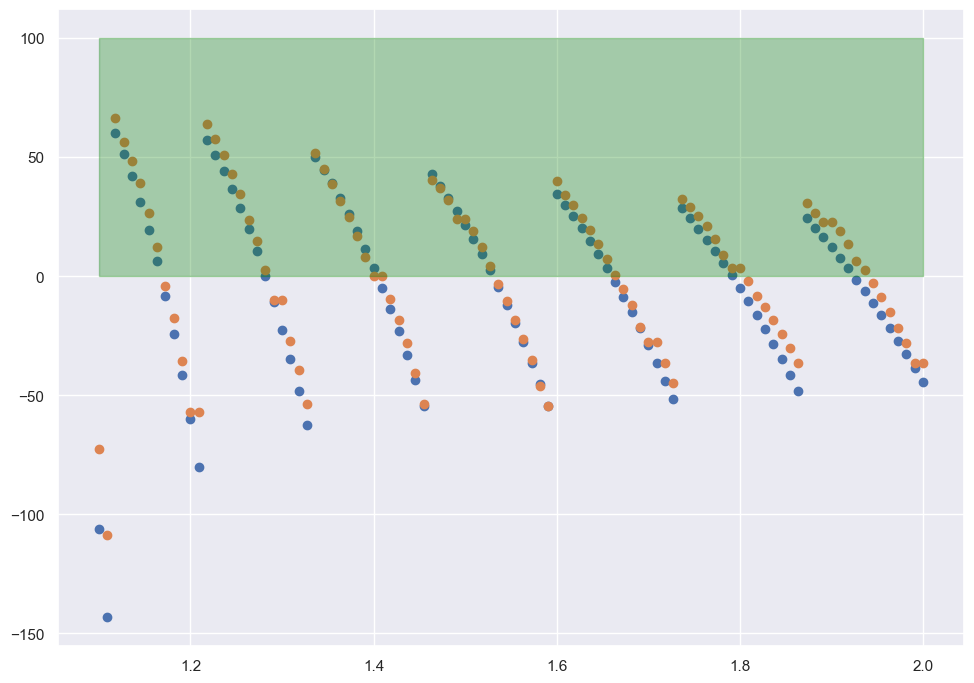

In [57]:
new1 = []
for i in range(len(p_theorical)):
    new1.append((1-p_theorical[i])*100-100000*p_theorical[i])
plt.scatter(xs, new1)

new2 = []
for i in range(len(p_practical)):
    new2.append((1-p_practical[i])*100-100000*p_practical[i])
plt.scatter(xs, new2)

plt.fill_between(xs, np.ones(len(new1))*100, alpha=0.3, color='green')
plt.show()

In [58]:
p_theorical[new2.index(max(new2))] , min(p_theorical)

(0.0004004760487528848, 0.0004004760487528848)

In [59]:
best = min(p_practical)
best

0.000335

In [60]:
xs[p_practical.index(min(p_practical))]

1.1181818181818182

In [61]:
(1-0.00278)*100-100000*0.00278

-178.27800000000002

ValueError: x and y must have same first dimension, but have shapes (100,) and (10000,)

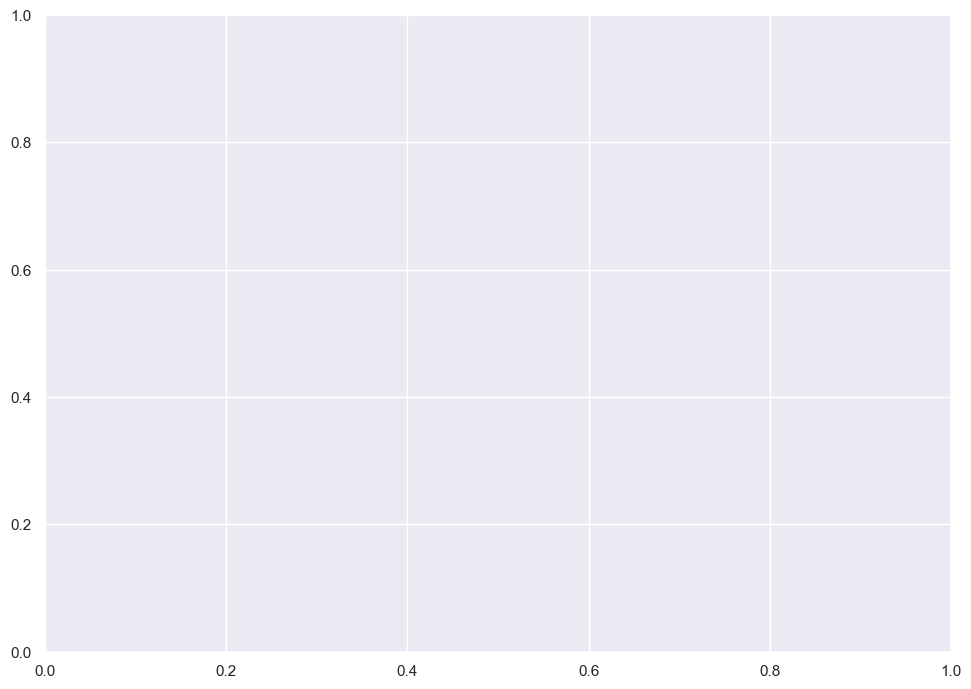

In [62]:
(1-best)*100-100000*best#%%
plt.plot(xs, p_theorical2, linewidth=1)
# plt.scatter(xs, p_theorical2)
# plt.plot(xs, p_practical2, linewidth=3)

plt.xlabel("Multiplier", fontsize=15)
plt.ylabel("Probabilty", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 0.005)

plt.title("Probabilty of Lossing by Multiplier", fontsize=20)
plt.legend(["Theoretical Results", "Practical Results"])
plt.show()

In [63]:
len(p_theorical2)

10000

ValueError: x and y must have same first dimension, but have shapes (100,) and (10000,)

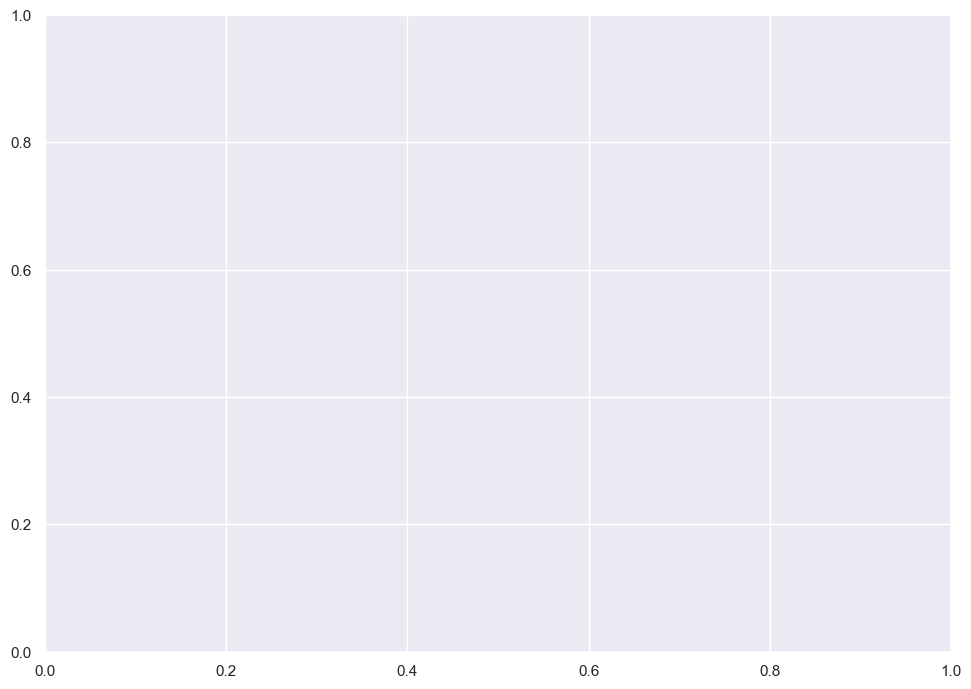

In [64]:
new = []
for i in range(len(p_theorical2)):
    new.append((1-p_theorical2[i])*100-100000*p_theorical2[i])
    
plt.plot(xs, new)
plt.fill_between(xs, np.ones(len(new))*50, alpha=0.3, color='green')
plt.show()

# Martingale Strategy - Our Version v2

Rs.20 Profit

In [90]:
def bid(begin_value=100, multiplier=1.2, end_value=100000):
    spend_list = [begin_value]
    bid_list = [begin_value]

    while spend_list[-1]<=end_value:
        if spend_list[-1] == begin_value:
            bid_list.append(round((spend_list[-1]*multiplier)*(1/(multiplier-1))))
            spend_list.append(sum(bid_list))
        else:
            bid_list.append(round((spend_list[-1] + begin_value*(multiplier-1))*(1/(multiplier-1))))
            spend_list.append(sum(bid_list))
    
    if spend_list[-1]>=end_value:
        spend_list.pop()
        bid_list.pop()
        
        
    print("Total Spend : \t\t\t\t\t", spend_list)
    print("Bid of Each Turn : \t\t\t\t", bid_list)
    print()
    print("No of turns you can play before runout of money: ", len(bid_list))
    
    negatives = []
    in_a_row = 0
    for result in results:
        if result < multiplier:
            in_a_row += 1
        else:
            in_a_row = 0
        negatives.append(in_a_row)
    negatives = np.array(negatives)
    print("\t\t\t\t\t\t From Data \t From Formula")
    print("\t\t\t\t\t\t-------------------------")
    for i in range(1, len(bid_list)+1):
        print("Probability of Losing %d Game(s) in a Row:\t"%i, round((negatives >= i).mean(),6),"\t",  round((1/33 + (32/33)*(.01 + .99*(1 - 1/multiplier)))**i, 6) )

In [91]:
x = 1.2
print("Our Guess :\t\t\t\t\t ", x)
bid(begin_value=100, multiplier=x, end_value=100000)
print("\n" ,"-"*100,"\n")

Our Guess :					  1.2
Total Spend : 					 [100, 700, 4300, 25900]
Bid of Each Turn : 				 [100, 600, 3600, 21600]

No of turns you can play before runout of money:  4
						 From Data 	 From Formula
						-------------------------
Probability of Losing 1 Game(s) in a Row:	 0.19303 	 0.2
Probability of Losing 2 Game(s) in a Row:	 0.037246 	 0.04
Probability of Losing 3 Game(s) in a Row:	 0.007135 	 0.008
Probability of Losing 4 Game(s) in a Row:	 0.001354 	 0.0016

 ---------------------------------------------------------------------------------------------------- 



In [92]:
for x in np.arange(1.1,2.1,0.1):
    print("Our Guess :\t\t\t\t\t ", round(x,5))
    bid(begin_value=100, multiplier=x, end_value=100000)
    print("\n" ,"-"*100,"\n")

Our Guess :					  1.1
Total Spend : 					 [100, 1200, 13300]
Bid of Each Turn : 				 [100, 1100, 12100]

No of turns you can play before runout of money:  3
						 From Data 	 From Formula
						-------------------------
Probability of Losing 1 Game(s) in a Row:	 0.11927 	 0.127273
Probability of Losing 2 Game(s) in a Row:	 0.014281 	 0.016198
Probability of Losing 3 Game(s) in a Row:	 0.001724 	 0.002062

 ---------------------------------------------------------------------------------------------------- 

Our Guess :					  1.2
Total Spend : 					 [100, 700, 4300, 25900]
Bid of Each Turn : 				 [100, 600, 3600, 21600]

No of turns you can play before runout of money:  4
						 From Data 	 From Formula
						-------------------------
Probability of Losing 1 Game(s) in a Row:	 0.199739 	 0.2
Probability of Losing 2 Game(s) in a Row:	 0.039925 	 0.04
Probability of Losing 3 Game(s) in a Row:	 0.007952 	 0.008
Probability of Losing 4 Game(s) in a Row:	 0.00157 	 0.0016

 ----------------

In [93]:
# Probability of Losing All the money
p_theorical = []
p_practical = []


def bid(begin_value=100, multiplier=1.2, end_value=100000):
    # At Begining
    spend_list = [begin_value]
    bid_list = [begin_value]
    
    # While Playing
    while spend_list[-1]<=end_value:
        if spend_list[-1] == begin_value:
            bid_list.append(round((spend_list[-1]*multiplier)*(1/(multiplier-1))))
            spend_list.append(sum(bid_list))
        else:
            bid_list.append(round((spend_list[-1] + begin_value*(multiplier-1))*(1/(multiplier-1))))
            spend_list.append(sum(bid_list))
    
    # We can't exeed the end value
    if spend_list[-1]>=end_value:
        spend_list.pop()
        bid_list.pop()
    
#     Calculate the Practical value
    negatives = []
    in_a_row = 0
    for result in results:
        if result < multiplier:
            in_a_row += 1
        else:
            in_a_row = 0
        negatives.append(in_a_row)
    negatives = np.array(negatives)

    p_practical.append((negatives >= len(bid_list)).mean())
    
    p_theorical.append((1/33 + (32/33)*(.01 + .99*(1 - 1/multiplier)))**len(bid_list))

In [94]:
from tqdm import tqdm 

xs = np.linspace(1.1,2.0,100)
for x in tqdm(xs):
    bid(begin_value=100, multiplier=x, end_value=100000) 

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.48it/s]


In [95]:
len(p_practical) , len(p_theorical)

(100, 100)

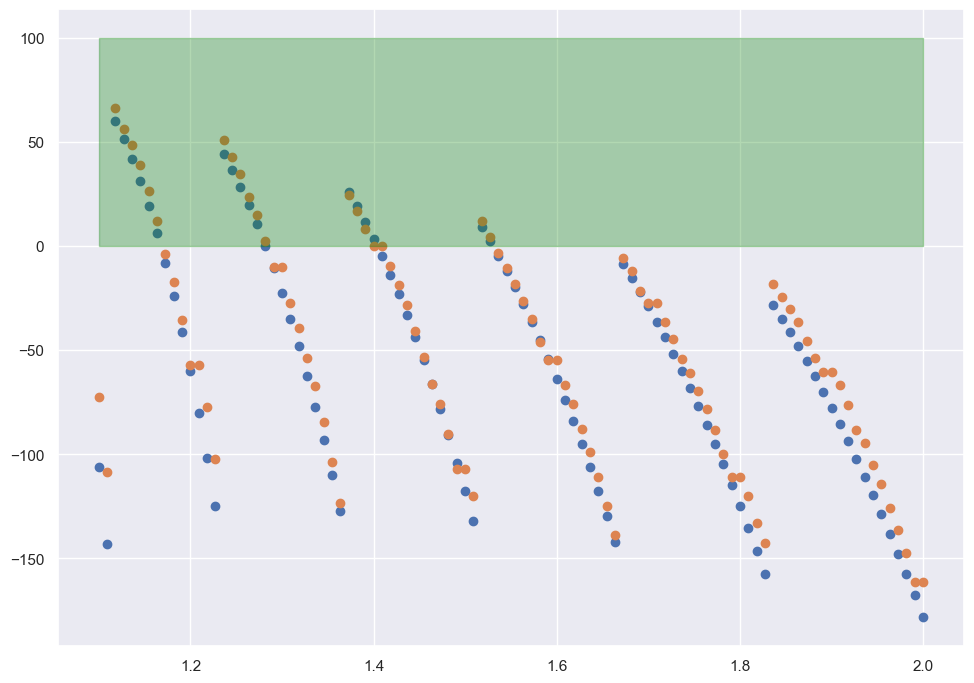

In [96]:
new1 = []
for i in range(len(p_theorical)):
    new1.append((1-p_theorical[i])*100-100000*p_theorical[i])
plt.scatter(xs, new1)

new2 = []
for i in range(len(p_practical)):
    new2.append((1-p_practical[i])*100-100000*p_practical[i])
plt.scatter(xs, new2)

plt.fill_between(xs, np.ones(len(new1))*100, alpha=0.3, color='green')
plt.show()

In [97]:
p_theorical[new2.index(max(new2))] , min(p_practical)

(0.0004004760487528848, 0.000335)

In [98]:
best = min(p_practical)
best

0.000335

In [99]:
xs[p_practical.index(min(p_practical))]

1.1181818181818182

In [100]:
(1-0.0004004760487528848)*100-100000*0.0004004760487528848

59.912347519836224

# Martingale Strategy - Our Version v3

Zero Profit

In [101]:
def bid(begin_value=100, multiplier=1.2, end_value=100000):
    spend_list = [begin_value]
    bid_list = [begin_value]

    while spend_list[-1]<=end_value:
        bid_list.append(round((spend_list[-1])*(1/(multiplier-1))))
        spend_list.append(sum(bid_list))
    
    if spend_list[-1]>=end_value:
        spend_list.pop()
        bid_list.pop()
        
        
        
    print("Total Spend : \t\t\t\t\t", spend_list)
    print("Bid of Each Turn : \t\t\t\t", bid_list)
    print()
    print("No of turns you can play before runout of money: ", len(bid_list))
    
    negatives = []
    in_a_row = 0
    for result in results:
        if result < multiplier:
            in_a_row += 1
        else:
            in_a_row = 0
        negatives.append(in_a_row)
    negatives = np.array(negatives)
    print("\t\t\t\t\t\t From Data \t From Formula")
    print("\t\t\t\t\t\t-------------------------")
    
    profit = 0
    wins = 0
    
    for i in range(1, len(bid_list)+1):
        wins += sum((negatives >= i))
        print("Probability of Losing %d Game(s) in a Row:\t"%i, round((negatives >= i).mean(),6),"\t",  round((1/33 + (32/33)*(.01 + .99*(1 - 1/multiplier)))**i, 6) )
    
    profit += (1000-wins)*100*(multiplier-1)

In [102]:
x = 1.2
print("Our Guess :\t\t\t\t\t ", x)
bid(begin_value=100, multiplier=x, end_value=100000)
print("\n" ,"-"*100,"\n")

Our Guess :					  1.2
Total Spend : 					 [100, 600, 3600, 21600]
Bid of Each Turn : 				 [100, 500, 3000, 18000]

No of turns you can play before runout of money:  4
						 From Data 	 From Formula
						-------------------------
Probability of Losing 1 Game(s) in a Row:	 0.19303 	 0.2
Probability of Losing 2 Game(s) in a Row:	 0.037246 	 0.04
Probability of Losing 3 Game(s) in a Row:	 0.007135 	 0.008
Probability of Losing 4 Game(s) in a Row:	 0.001354 	 0.0016

 ---------------------------------------------------------------------------------------------------- 



In [103]:
for x in np.arange(1.1,2.1,0.1):
    print("Our Guess :\t\t\t\t\t ", round(x,5))
    bid(begin_value=100, multiplier=x, end_value=100000)
    print("\n" ,"-"*100,"\n")

Our Guess :					  1.1
Total Spend : 					 [100, 1100, 12100]
Bid of Each Turn : 				 [100, 1000, 11000]

No of turns you can play before runout of money:  3
						 From Data 	 From Formula
						-------------------------
Probability of Losing 1 Game(s) in a Row:	 0.11927 	 0.127273
Probability of Losing 2 Game(s) in a Row:	 0.014281 	 0.016198
Probability of Losing 3 Game(s) in a Row:	 0.001724 	 0.002062

 ---------------------------------------------------------------------------------------------------- 

Our Guess :					  1.2
Total Spend : 					 [100, 600, 3600, 21600]
Bid of Each Turn : 				 [100, 500, 3000, 18000]

No of turns you can play before runout of money:  4
						 From Data 	 From Formula
						-------------------------
Probability of Losing 1 Game(s) in a Row:	 0.199739 	 0.2
Probability of Losing 2 Game(s) in a Row:	 0.039925 	 0.04
Probability of Losing 3 Game(s) in a Row:	 0.007952 	 0.008
Probability of Losing 4 Game(s) in a Row:	 0.00157 	 0.0016

 ----------------

In [104]:
# Probability of Losing All the money
p_theorical = []
p_practical = []


def bid(begin_value=100, multiplier=1.2, end_value=100000):
    # At Begining
    spend_list = [begin_value]
    bid_list = [begin_value]
    
    # While Playing
    while spend_list[-1]<=end_value:
        bid_list.append(round((spend_list[-1])*(1/(multiplier-1))))
        spend_list.append(sum(bid_list))
    
    # We can't exeed the end value
    if spend_list[-1]>=end_value:
        spend_list.pop()
        bid_list.pop()
    
#     Calculate the Practical value
    negatives = []
    in_a_row = 0
    for result in results:
        if result < multiplier:
            in_a_row += 1
        else:
            in_a_row = 0
        negatives.append(in_a_row)
    negatives = np.array(negatives)

    p_practical.append((negatives >= len(bid_list)).mean())
    
    p_theorical.append((1/33 + (32/33)*(.01 + .99*(1 - 1/multiplier)))**len(bid_list))

In [105]:
from tqdm import tqdm 

xs = np.linspace(1.1,2.0,100)
for x in tqdm(xs):
    bid(begin_value=100, multiplier=x, end_value=100000) 

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.39it/s]


In [106]:
len(p_practical) , len(p_theorical)

(100, 100)

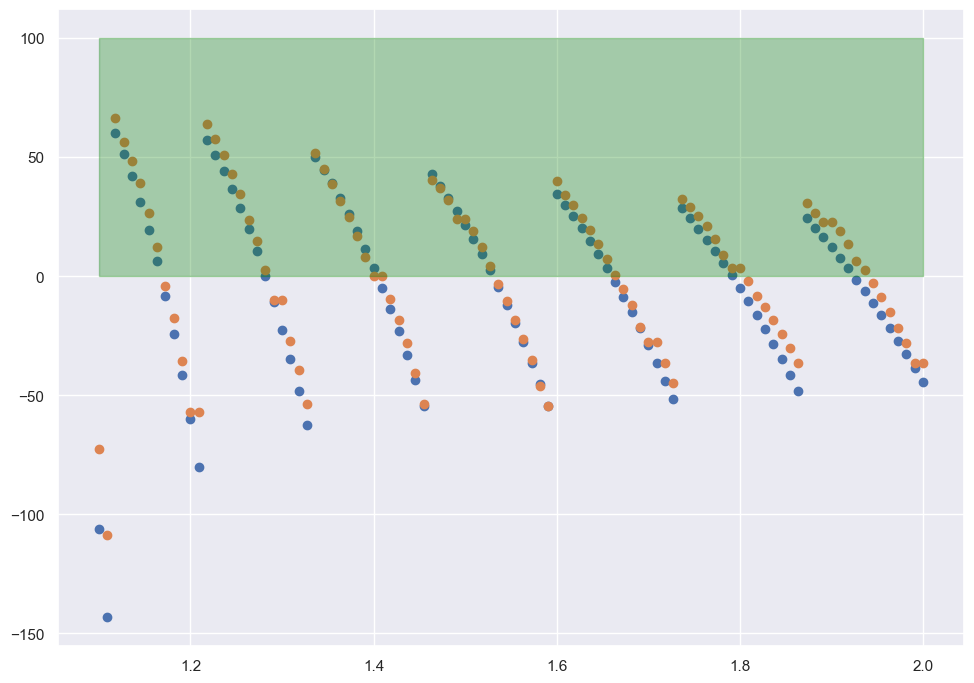

In [107]:
new1 = []
for i in range(len(p_theorical)):
    new1.append((1-p_theorical[i])*100-100000*p_theorical[i])
plt.scatter(xs, new1)

new2 = []
for i in range(len(p_practical)):
    new2.append((1-p_practical[i])*100-100000*p_practical[i])
plt.scatter(xs, new2)

plt.fill_between(xs, np.ones(len(new1))*100, alpha=0.3, color='green')
plt.show()

In [108]:
p_theorical[new2.index(max(new2))] , min(p_theorical)

(0.0004004760487528848, 0.0004004760487528848)

In [109]:
best = min(p_practical)
best

0.000335

In [110]:
xs[p_practical.index(min(p_practical))]

1.1181818181818182

In [111]:
(1-0.00278)*100-100000*0.00278

-178.27800000000002

In [112]:
(1-best)*100-100000*best

66.4665

In [113]:
max(results)

1376604.16

In [114]:
import crash
crash.get_times_crashed_above("100af1b49f5e9f87efc81f838bf9b1f5e38293e5b4cf6d0b366c004e0a8d9987", 100000)

1

In [115]:
1/crash.get_number_games_since_hash("100af1b49f5e9f87efc81f838bf9b1f5e38293e5b4cf6d0b366c004e0a8d9987")


1.6155349844100875e-06